# CNNs and Computer Vision with TensorFlow

This notebook will allow us to learn about building and using CNNs. We'll start off by trying to classifiy whether a picture of food contains pizza or steak.

In [1]:
import zipfile

# Download the zipfile of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-17 05:45:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.74.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   196MB/s    in 0.5s    

2022-06-17 05:45:05 (196 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

How do we figure out just how many pictures there are in the pizza training subfolder?

In [4]:
import os 

#Walk through the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
#Another way to find how many images are in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [6]:
#What if we had a really long list of classes and wanted to find out all class names?

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Now that we've gotten the size of our dataset and the corresponding class names, let's visualize it! We'll start off by creating a function to view a random image.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup target directory, we'll view images from here
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


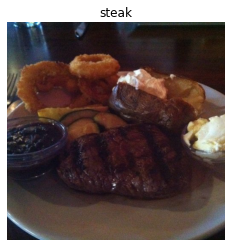

In [8]:
#View a random image from the training dataset 
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class= "steak")

In [9]:
#view the img the way the computer sees it
img

array([[[ 49,  91, 149],
        [ 44,  86, 144],
        [ 39,  82, 137],
        ...,
        [ 53,  64,  48],
        [ 53,  64,  48],
        [ 53,  64,  48]],

       [[ 50,  92, 150],
        [ 51,  93, 151],
        [ 48,  91, 146],
        ...,
        [ 52,  63,  47],
        [ 48,  59,  43],
        [ 43,  54,  38]],

       [[ 47,  89, 147],
        [ 54,  96, 154],
        [ 51,  94, 149],
        ...,
        [ 45,  56,  40],
        [ 41,  52,  36],
        [ 37,  48,  32]],

       ...,

       [[ 32,  27,  34],
        [ 31,  26,  32],
        [ 29,  24,  30],
        ...,
        [ 12,  12,  14],
        [ 16,  15,  20],
        [ 15,  14,  19]],

       [[ 28,  23,  30],
        [ 30,  25,  31],
        [ 30,  25,  31],
        ...,
        [ 12,  11,  16],
        [ 14,  13,  18],
        [ 12,  11,  16]],

       [[ 29,  24,  31],
        [ 32,  27,  34],
        [ 34,  29,  35],
        ...,
        [ 13,  12,  17],
        [ 13,  12,  17],
        [ 10,   9,  15]]

The three parameters returned by the shape function are the width, height and colour channels.

🔑**Note:** We've learnt before that many machine models, including neural networks, prefer the values that they work with to be between 0 and 1. We will therefore scale their pixel values by dividing the image arrays by 255. 

In [10]:
#Get all the values between 0 and 1
img/255

array([[[0.19215686, 0.35686275, 0.58431373],
        [0.17254902, 0.3372549 , 0.56470588],
        [0.15294118, 0.32156863, 0.5372549 ],
        ...,
        [0.20784314, 0.25098039, 0.18823529],
        [0.20784314, 0.25098039, 0.18823529],
        [0.20784314, 0.25098039, 0.18823529]],

       [[0.19607843, 0.36078431, 0.58823529],
        [0.2       , 0.36470588, 0.59215686],
        [0.18823529, 0.35686275, 0.57254902],
        ...,
        [0.20392157, 0.24705882, 0.18431373],
        [0.18823529, 0.23137255, 0.16862745],
        [0.16862745, 0.21176471, 0.14901961]],

       [[0.18431373, 0.34901961, 0.57647059],
        [0.21176471, 0.37647059, 0.60392157],
        [0.2       , 0.36862745, 0.58431373],
        ...,
        [0.17647059, 0.21960784, 0.15686275],
        [0.16078431, 0.20392157, 0.14117647],
        [0.14509804, 0.18823529, 0.1254902 ]],

       ...,

       [[0.1254902 , 0.10588235, 0.13333333],
        [0.12156863, 0.10196078, 0.1254902 ],
        [0.11372549, 0

## A Typical Architecture of a CNN

Convolution neural networks are no different to other kinds of deep neural networks in the fact that they can be created in many different ways. 

The code in the following dataset replicates an end-to-end way to model our pizza_steak datset with a CNN using its different components. The model we're using replicates TinyVGG.

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed 
tf.random.set_seed(42)

#Preprocess the data (get all the values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup the training and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

#Create a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters =10,
                                                             kernel_size = 3,
                                                             activation ="relu",
                                                             input_shape = (224,224,3)), #first layer defines input shape
                                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                      tf.keras.layers.MaxPool2D(pool_size = 2,
                                                         padding = "valid"),
                                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation = "sigmoid")

                                      
])

#compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 264ms/step - loss: 0.5629 - accuracy: 0.7007 - val_loss: 0.3614 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4219 - accuracy: 0.8180 - val_loss: 0.3657 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3972 - accuracy: 0.8273 - val_loss: 0.3213 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3320 - accuracy: 0.8593 - val_loss: 0.2919 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2754 - accuracy: 0.8973 - val_loss: 0.2875 - val_accuracy: 0.8680


Our model has achieved 87% accuracy across training and testing sets for this binary classification problem. However, We want to ensure it will perform well over all 101 classes. For now though, at least we know our model is learning something. 

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the Same Model As Before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

The difference here is that we are now working with images instead of dots and we have to explicitly tell the neural network the input shape of our images - a common practice is to resize the images to (224,224,3)

In [13]:
tf.random.set_seed(42)

#Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)), #dense layers expects a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data, # sue same validation data created above
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 1.4087 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Hmm our model ran but it doesn't seem like it learned anything. Only 50% accurate on training and test sets which is basically guessing for binary classification.

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


The architecture shows that `model_2` how much more parameters than `model_1`. Despite having 20x more parameters than `model_1`, `model_2` still performs significantly weaker than `model_1`.

🔑**Note:** Intuitively one might think that more is better, and sometimes that's true with neural networks. But here, the key difference is the two different styles of model that we're using.Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of learnable patterns, a *convolutional neural network seeks to sort out and learn the most important patterns in an image*. So even if there are less learanble parameters in our CNN, these are often more helpful in deciphering between different *features* in an image.

Let's increase the complexity of our model by adding an extra layer and increasing the number of neurons in each layer from 4 to 100.

In [15]:
tf.random.set_seed(42)

#Create a model to replicate the TensorFlow playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)), #dense layers expects a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#fit the model
history_3 = model_2.fit(train_data, # use same training data created above
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data, # use same validation data created above
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Our model seems to be learning again, achieving around 77% for both training and testing. Let's look at the architecture.

In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Crazy. `Model_3` used close to 500x more trainable parameters and still was not able to out perform `model_1`. This goes to show the power of CNNs.

## Binary Classification: Let's Break it Down

Steps for modelling:

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat baseline)
7. Repeat until satisfied


### 1. Importing and becoming one with the data
Always try to visualize 10-100 samples to start building a mental model of the data. Eg. Steak images tend to have darker colours and pizza images tend to have circular shape in middle.


Image shape: (512, 512, 3)
Image shape: (512, 287, 3)


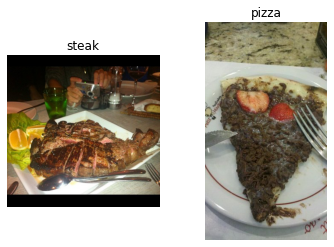

In [17]:
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

Here we split our data into training and test sets. First we define the training and test path directories. 

In [18]:
#setup the training and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next we turn our data into batches. A batch is a small subset of the dataset a model looks at during training . A model uses batches because a large image dataset might not fit into the memnory of your GPU or trying to learn patterns on that big a dataset in one go could cause the mmodel not to learn very well.

A batch size of 32 is good for your health.model_1
To turn our data into batches, we'll first create an instance of `ImageDataGenerator` for each of our datasets.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale =1/255.)


The `ImageDataGenerator`class helps us prepare our images into batches as well as perform the transformations on them as they get loaded into the model. The `rescale` parameter is one of the transformations we're doing. It converts all pixel values to between 0 and 1 (normalizes them).model_1

Now that we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the `flow_from_directory` method

In [20]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory =train_dir,
                                               target_size = (224,224),
                                               class_mode ='binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


We can take a look at our batched images and labels by inspecting the `train_data` object

In [21]:
images, labels = train_data.next() #get next batch of images/labels
len(images), len(labels)

(32, 32)

In [22]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [23]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Now that our data is ready, our model is going to try and figure out the patterns between image tensors and labels

### 3. Create a model (start with a baseline)

A simple heuristic for computer vision is to use the model architecture which is performing best on ImageNet ( a large collection of diverse images to benchmark different computer vision models).

To begin with , however, it's good to build a smaller model to acquire a baseline result which you can try and improve on.

A small model in deep learnin often refers to one with much fewer layers (eg.4) than SOTA model (eg.50)



In [24]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
#Create the model - our baseline: a 3 layer CNN

model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding = 'valid',
         activation = 'relu',
         input_shape = (224,224,3)), #input layer where we specify the input shape
  Conv2D(10, 3, activation = 'relu'),
  Conv2D(10, 3, activation = 'relu'),
  Flatten(),
  Dense(1, activation = 'sigmoid') #output laye (specify output shape)
])

#### CNN Theory

Some components of a **``Conv2D``** layer:

* The ``2D`` means our inputs are 2 dimensional
* ``Filters`` - The number of "feature extractors" that will be moving over our images
* ``kernel_size`` - The size of our filters, a kernel size of (3,3) or just 3 will mean each filter will have size 3x3, meaning it'll look at 3x3 pixels each time. A smaller kernel implies more fine-grained features will be extracted.
* ``stride`` - The number of pixels a filter will move across as it covers the image
*``padding`` - can be 'same' or 'valid'; 'same' adds zeros to the outside of the image so the resulting convolutional layer is the same as the input, 'valid' cuts off excess pixels where the filter doesn't fit example (224 pixels/3 for a kernel size of 3 equals 74.6, this means a single pixel will get cut off in the end)

A **filter** is any significant part of the image that's defined by the model itself.

Our model is now ready, let's compile it

In [26]:
#compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics = ['accuracy'])

### 4. Fit a Model

``steps per epoch`` - The number of batches a model will go through per epoch, inour case it'll be 1500 images/32batch_size = ~47
``validation_steps`` - The same as above except that it applies to the validation_data parameter here (500 test images/ 32_batch_size = ~16) 

In [27]:
#Check the length of the training and test data generators
len(train_data), len(test_data)

(47, 16)

In [28]:
#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.9526 - accuracy: 0.7080 - val_loss: 0.4238 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4176 - accuracy: 0.8173 - val_loss: 0.4365 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.2809 - accuracy: 0.8940 - val_loss: 0.3741 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.1378 - accuracy: 0.9540 - val_loss: 0.5029 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.0407 - accuracy: 0.9900 - val_loss: 0.6103 - val_accuracy: 0.7820


### 5. Evaluate the Model

Oh yes, our model is learning somethingm, let's check out the training curves



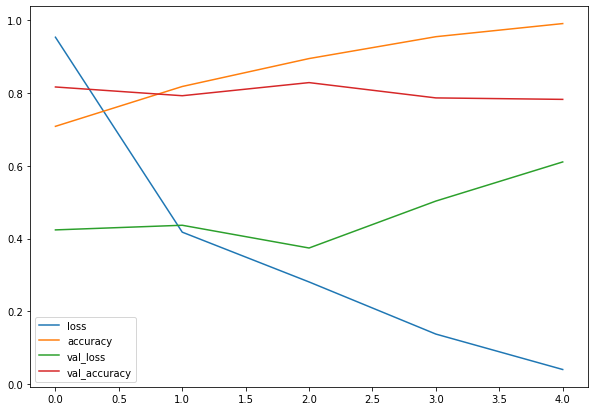

In [29]:
# plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

Judging from the above curve, it looks as if our model is **overfitting** the data 

🔑 **Note:** When a model's *validation loss starts to increase*, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

In [30]:
def plot_loss_curves(history):

  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  
  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();




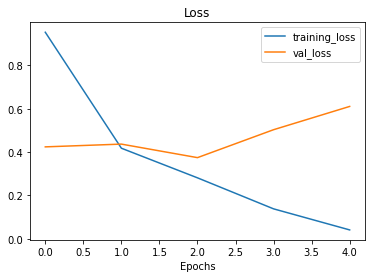

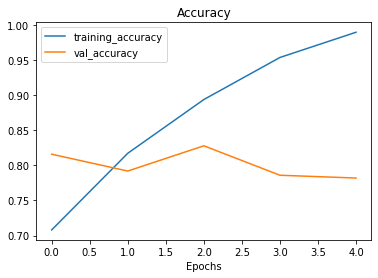

In [31]:
#check out loss curves of model_4
plot_loss_curves(history_4)

Ideally the curves need to follow each other. If anything, the validation curve should be slightly beneath the training curve. If theres a large gap between the two, its liekly thata your model is overfitting.

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create the baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

We've covered the first 2 steps so far. We could carry on overfitting by increasing the convolutional layers, convolutional filters, or adding another dense layer to the output of our flattened layer.

But lets focus on reducing the overfitting now. We do that by adjusting parameters and inspecting the training curves along the way.

We'll build two models:
* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation

In [33]:
model_5 = Sequential([
  Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), #reduce the number of features by half
  Conv2D(10,3,activation = 'relu'),
  MaxPool2D(),
  Conv2D(10,3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

``Max Pooling`` is basically the model figuring out the most important features learnt by the convolutional layers.

In [34]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [35]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 0.6077 - accuracy: 0.6620 - val_loss: 0.4713 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4854 - accuracy: 0.7787 - val_loss: 0.4138 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4319 - accuracy: 0.8207 - val_loss: 0.3771 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4544 - accuracy: 0.7807 - val_loss: 0.4437 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4075 - accuracy: 0.8207 - val_loss: 0.3525 - val_accuracy: 0.8420


Okay, it looks like maxpooling is performing better on the validation set but worse on the training set. Let's check out its architecture.

In [36]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

MaxPooling seems to be halving layer each time. Essentially discarding irrelevant features. Major reduction in parameters, model_4 had 477431.

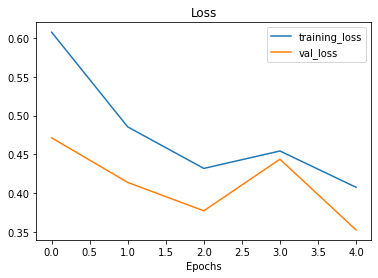

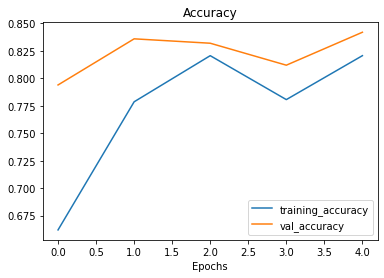

In [37]:
plot_loss_curves(history_5)

We can see that our curves are closer together. However towards the end they start drifting apart. Possible overfitting. Let's try data augmentation.

To implement it, we'll have to reinstantiate `ImageDataGenerator`

In [38]:
# Create ImageDataGenerator training instance wwith data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=20, #rotate image slightly between 0 and 20 degrees
                                             shear_range = 0.2, # shear the image
                                             zoom_range = 0.2, #zoom into the image
                                             width_shift_range = 0.2 ,#shift the image width ways
                                             height_shift_range = 0.2, #shift the image height ways
                                             horizontal_flip = True) #flip the image on the horizontal axis

#Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255)

**Data Augmentation** is the process of altering our training data, leading ot it having more diversity and in turn allowing our models to learn more generalizable 

🔑**Note:** Data augmentation is usully performed on our training data. Using the ``ImageDataGenerator`` built-in data augmentation parameters, our images are left as they are in the directories but are randomly manipulated when loaded into the model



In [39]:
#Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False) #Don't shuffle for demonstration purposes

print("Non-Augmented trainng images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False) #Don't shuffle for demonstration purposes#Create non-augmented data batches


print("Unchanged test images")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = 'binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-Augmented trainng images:
Found 1500 images belonging to 2 classes.
Unchanged test images
Found 500 images belonging to 2 classes.


Lets Visualize

In [40]:
#Get data batch samples
images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

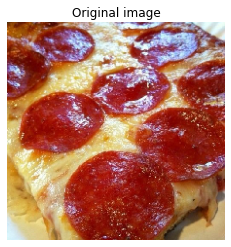

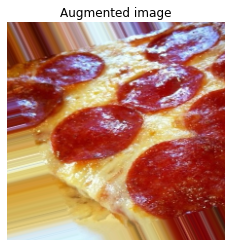

In [41]:
#Show original and augmented image
random_number = random.randint(0,32) #we're making a batch size of 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Data augmentation is a way to try and prevent overfitting, if your model is overfitting (eg. validation loss keeps increasing), use data agmentation

There's no set practice as to how much to data augment. Best option is to check the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation

Let's see the effect augmentation has on model_5.

In [42]:
# Create the model
model_6 = Sequential([
  Conv2D(10,3,activation = 'relu', input_shape =(224,224,3)),
  MaxPool2D(pool_size=2), #reuce number of features by half
  Conv2D(10,3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')
])

#Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy'])

#fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 485ms/step - loss: 0.7070 - accuracy: 0.4573 - val_loss: 0.6851 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6922 - accuracy: 0.5413 - val_loss: 0.6720 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6552 - accuracy: 0.6433 - val_loss: 0.5691 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6019 - accuracy: 0.7140 - val_loss: 0.4349 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5649 - accuracy: 0.7133 - val_loss: 0.5903 - val_accuracy: 0.7000


Why didnt' our model get good results to begin with?

When we created `train_data_augmented` we turned off shuffling using `shuffle=false` which means our model only sees a batch of a single class at a time. The performance is therefore mesured only on a single class instead of both classes.

Let's notice the difference when using `shuffle=true`

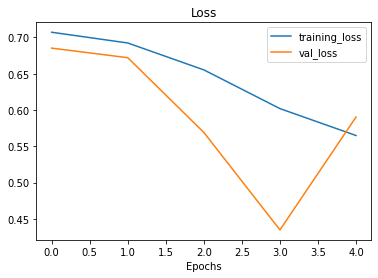

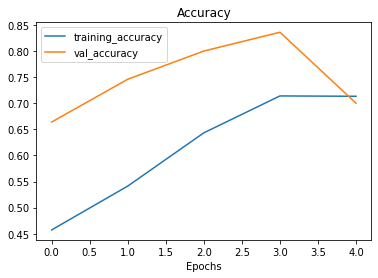

In [43]:
plot_loss_curves(history_6)

Our validation loss curve is heading in the right direction but is too spiky

In [44]:
#Import data and augment it from training directory
print("Augmented trainng images:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=True) #Don't shuffle for demonstration purposes

Augmented trainng images:
Found 1500 images belonging to 2 classes.


In [45]:
# Create the model
model_7 = Sequential([
  Conv2D(10,3,activation = 'relu', input_shape =(224,224,3)),
  MaxPool2D(pool_size=2), #reuce number of features by half
  Conv2D(10,3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')
])

#Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy'])

#fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6455 - accuracy: 0.6140 - val_loss: 0.5135 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5194 - accuracy: 0.7480 - val_loss: 0.3658 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4874 - accuracy: 0.7653 - val_loss: 0.3801 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 22s 474ms/step - loss: 0.4820 - accuracy: 0.7760 - val_loss: 0.3359 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4671 - accuracy: 0.7827 - val_loss: 0.3394 - val_accuracy: 0.8520


In [ ]:
plot_loss_curves(history_7)

Thw training dataset improves almost immediately on `model_7` compared to `model_6`. Also, our loss curves look a bit smoother with shuffled data. 

### 7. Repeat Until Satisfied

There are a few more thing we could do to continue to improve our model

* Increase the number of layers
* Increase the number of filters for each convolutional layer (32,64,128 - trial and error)
* Train for longer* Finding an ideal learning rate
* Get more data
* Use **Transfer learning** to leverage what another model has learned ad adjust it for our own use case

Adjusting the above is called **hyperparameter tuning**

## Making a Prediction with our Trained Model

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

This image needs to be resized to (224,224,3) to use it with our model. We do this by decoding our image using `tf.io.read_file`(for reading files) and `tf.image` (for resizing our image and turning it into a tensor).

In [49]:
#Create a fucntion to import an image and resize it to spec

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filenam, and turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel).
  """

  #Read in target file (an image)
  img = tf.io.read_file(filename)

  #Decode the read file into a tensor and ensure 3 colour channels
  img = tf.image.decode_image(img, channels=3)

  #Resize the image
  img = tf.image.resize(img, size =[img_shape, img_shape])

  #Rescale the image
  img = img/255.
  return img

In [50]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Even though our image is now a tensor of the right input_shape, we'd still be missing a dimension. Because our model was trained in batches, the batch size becomes the first dimension. We can fix this by adding an extra dimension to our custom image tensor using tf.expand_dims

In [51]:
#Add an extra axis 
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [52]:
pred = model_7.predict(steak)
pred

array([[0.9396817]], dtype=float32)

Prediction probability > 0.5 means the prediction is most liekly to be the positive class (class1). Or else, prediction is likely to be negative class (class 0). Let's make this more intuitive.






In [53]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class in the title.
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred =model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  #Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

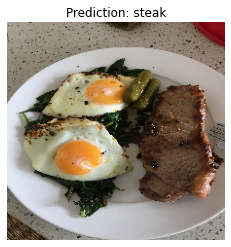

In [54]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

## Multi-Class Classification

Workflow:

1. Get the data ready
2. Build or pick a pretrained model to suit your problem
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

We will now work with 10 different types of food


### 1. Import and Become One With the Data

In [55]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-17 05:54:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   221MB/s    in 2.2s    

2022-06-17 05:54:30 (221 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [56]:
import os
#walk through 10_food_classes directory and list the number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are2 directories and 0 images in '10_food_classes_all_data'.
There are10 directories and 0 images in '10_food_classes_all_data/train'.
There are0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are10

In [57]:
#setup training and testing directory paths
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

#get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


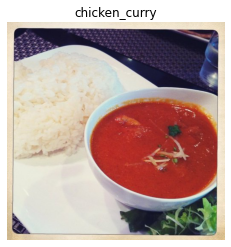

In [58]:
#view a random image form the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the Data

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load the data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a Model (Start With Baseline)

We can use same TinyVGG model that we used for binary classification with a couple of small tweaks

Namely:
* Changing the output layer to have 10 output neurons
* Changing the output layer to use 'softmax' activation
* Changing the loss function to categorical _crossentropy

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#Create our model
model_9 = Sequential([
  Conv2D(10,3, activation = 'relu',   input_shape = (224,224,3)),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(),
  Conv2D(10,3, activation = 'relu'),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = 'softmax')
])

#Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])




### 4. Fit the Model

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 193ms/step - loss: 0.1213 - accuracy: 0.9689 - val_loss: 4.8475 - val_accuracy: 0.2516
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 0.0431 - accuracy: 0.9889 - val_loss: 5.8989 - val_accuracy: 0.2568
Epoch 3/5
163/235 [===================>..........] - ETA: 10s - loss: 0.0193 - accuracy: 0.9965

### 5. Evaluate the Model


In [ ]:

model_9.evaluate(test_data)

In [ ]:
plot_loss_curves(history_9)

That's a significant gap between the training and validation loss curves. This means that the model is overfitting the training set quite badly, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on test data

The steps to prevent overfitting include:

* Getting more data -  Allows for model to learn more patterns which may be generalizable to new examples
* Simplifying the model -  Model may be too complicated meaning its lerning training data too well, reducing layers or hidden units in each layer may help
* Use data augmentation - Adding more variety to the data allows for model to generalize better to unseen data
* Use transfer learning - We could use one computer vision model pretrained on a large variety of images then tweak it to be more specialized for food images

Preventing overfitting is called **Regularization**

Lets start with simplifying our model and take total amount of convolutional layers from 4 to 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#Create our model
model_10 = Sequential([
  Conv2D(10,3, activation = 'relu',   input_shape = (224,224,3)),
  MaxPool2D(),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = 'softmax')
])

#Compile the model
model_10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_10 = model_10.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_curves(history_10)

Even with a simplified model, the model is still dramatically overfitting the training data. Let's try **Data augmentation**

In [ ]:
#Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode = 'categorical')

To see how the augmented data will work on the same `model_10`we can use the `clone_model` function instead of rewriting it from sractch

In [ ]:
# Clone the model
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])
#Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps = len(test_data))


Each epoch takes longer to train than previous model. That's because data is being augmented on the fly on the CPU as it gets loaded onto the GPU.

In [ ]:
plot_loss_curves(history_11)

Looks much better! Even though the model didn't perform as well on the augmented training set, it performed much better on the validation training set. Perhaps if we trained it longer, the evalution metrics might continue to improve.


### 7. Repeat Until Satisfied

The process of further repeating our process to imrpove our model could take a fairly long time. We're yet to try out **transfer learning** though. That's for notebook 04, for now, let's do some predicting.

## Making a Prediction with our Trained Model

In [ ]:
#Get testing images

!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
#make a prediction using model_11
pred_and_plot(model=model_11,
              filename = "03-steak.jpeg",
              class_names = class_names)

Our `pred_and_plot` function was designed to be used with binary classification models whereas our current model is a multi-classification model.

The class with the highest probability is what the model believes the image contains

We can find the maximum value index using `argmax` and then use that to index our `class_names` list to output the predicted class

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class in the title.
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred =model.predict(tf.expand_dims(img, axis=0))

  #get predicted class
  if len(pred[0])>1: #check for multiclass
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] #if only one output

  #Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)


In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", classnames)


In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", classnames)


Predictions aren't very good, which is expected with our model performing at ~35% accuracy